# OBJECT DETECTION

**What is Object Detection?**

* Object Detection is a technology of computer vision, where things, human beings, building, cars can be detected as object in image and videos.
* Object detection is merely to recognize the object with bounding box in the image, where in image classification, we can simply classify that is an object in the image or not in terms of the likelihood.
* Object detection involves "image classification" and "image localization".


---



**Algorithms Used**

* SSD-MoibleNet
* YOLO


---


**Libraries used**

* OpenCV(Python)
* Tenserflow object detection API


---



**Dataset used**

* COCO dataset (comprises of 80 classes)


---



**Files Used**

* Config file - https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API

  Download 'weights' and 'config' file for MobileNet-SSD v3

* Coco dataset - https://github.com/pjreddie/darknet/blob/master/data/coco.names

  Download and use '.txt' file here.


---



# Image demo

Step 1 : Importing all the necessary libraries.

In [ ]:
#importing libraries
import cv2
import matplotlib.pyplot as plt
from matplotlib import ft2font
print("Libraries imported successfully!")

Libraries imported successfully!


**Step 2 : We need the configuration file to train the model and frozen model file. An object detection model is trained to detect the presence and location of multiple classes of objects. For example, a model might be trained with images that contain various pieces of fruit, along with a label that specifies the class of fruit they represent (e.g. an apple, a banana, or a strawberry), and data specifying where each object appears in the image.**

In [ ]:
#importing and using necessary files
config_file='../input/objectdetection/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='../input/objectdetection/frozen_inference_graph.pb'

#Tenserflow object detection model
model = cv2.dnn_DetectionModel(frozen_model,config_file)


**Step 3 : Coco dataset is the file consisting of all the object classes. So, in this step we will read the dataset and examine its information like number of classes and its labels.**

In [ ]:
#Reading Coco dataset
classLabels=[]
filename='../input/objectdetection/yolov3.txt'
with open(filename,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')

print("Number of Classes")
print(len(classLabels))
print("Class labels")
print(classLabels)

Number of Classes
80
Class labels
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Step 4 : Training the model. 
** Here, set the various parameters such as size, scaling, mean and color values of the input image. So, the parameters provided to the model will act as training parameters. **

In [ ]:
#Model training
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0x7f88eaf93ed0>

**Step 5 : To read the sample image using matplotlib.**

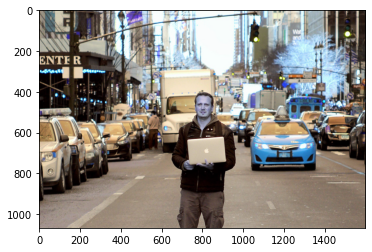

In [ ]:
#reading image
img = cv2.imread('../input/image3/sample.jpg')
plt.imshow(img)

**Step 6 : To convert the img into RGB form using opencv from BGR format.**

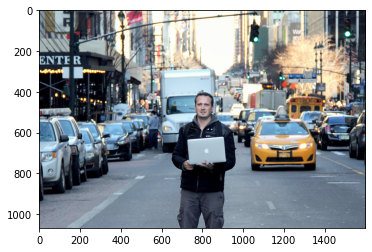

In [ ]:
#converting image from BGR to RGB
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

**Step 7 : Finally we are a step closer to detect the object. Hence, from the image with the help of our trained model we will retrive information such as class index (object), confidence (accuracy level) and bbox (location co-ordinates).**

In [ ]:
#object detection
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

**Step 8 : To print the accuracy rate.**

In [ ]:
#fetching accuracy
print(confidence)

[[0.7711565 ]
 [0.72707874]
 [0.7237637 ]
 [0.7212671 ]
 [0.6760945 ]
 [0.671836  ]
 [0.6363414 ]
 [0.60687923]
 [0.59556425]
 [0.595388  ]
 [0.5937964 ]
 [0.5856311 ]
 [0.57673174]
 [0.5689038 ]
 [0.56511927]
 [0.559943  ]
 [0.54572237]
 [0.5449435 ]
 [0.5358321 ]
 [0.52353   ]
 [0.52098787]
 [0.514513  ]
 [0.5125533 ]
 [0.50800025]
 [0.50565225]
 [0.50520414]]


**Step 9 : To print the index of the class (object).**

In [ ]:
#fetching object index
print(ClassIndex)

[[ 3]
 [ 3]
 [ 3]
 [ 8]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [10]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [10]
 [ 8]
 [ 3]
 [ 3]
 [ 3]
 [ 8]
 [ 3]
 [10]]


**Step 10 : To print the axis points so that we can get the location of the object in the image.**

In [ ]:
#fetching coordinates of boxes
print(bbox)

[[   4  512  238  375]
 [1029  528  340  261]
 [  68  511  244  358]
 [ 572  296  335  398]
 [ 619  318  326  699]
 [ 316  520  222  206]
 [1270  499  130  114]
 [ 971  485  224  211]
 [ 181  532  150  279]
 [1405  499  144  154]
 [1491   81   40   68]
 [1039   73   40   96]
 [1145  319   29   59]
 [ 976  479  181  152]
 [ 949  486  127  161]
 [ 297  545  146  168]
 [ 135    0 1407  589]
 [ 478  528  100  151]
 [1488   46   39   64]
 [ 531  346  449  399]
 [ 276  528  196  213]
 [1384  502  189  201]
 [ 962  526   85  141]
 [ 957  439  235  192]
 [ 574  157 1013  595]
 [1031   44   42   99]]


**Step 11. Finally! It's the time to plot the boxes around the object and identify the object by printing its name near the box. As a result, we will set the values for font, font scale, color of rectangle, font color, thickness of box and display the image with the detected objects.**

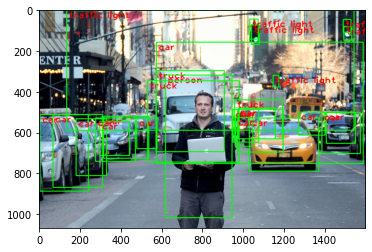

In [ ]:
#plotting boxes
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (0, 255, 0), 3)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 0, 255), thickness=3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**As shown above, objects such as person, car, truck and traffic light are detected accurately from the image. Also the average accuracy of the model is greater than 60% which is fair enough.**

**Thus, the object detection model using OpenCV library in python is applied successfully.**

---



References : https://towardsdatascience.com/

**Thank You!**